#BASIC INFORMATION (ReadMe)



**1.  About Jupyter Notebook and Google Colab**
- Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning etc.
- Google Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. 

**2.   About this lab**

- In this lab we will explore and use Melbourne housepricing dataset.  Each row in the dataset is a housing sale and columns are the features of the sold house/appartment.


- The goal is to predict the price of new sales. We will build two supervised models: regression models and artificial neural network. ML pipeline outlined in the theory part of the course will be followed. 


**3.  How to save own version of the Jupyter notebook**

- Go to File and choose "Save a copy in Drive". This will save your code notebook on your Google Drive.

**4.   How to run/execute cell of code**

- Alt 1: Ctrl+Enter tab through the code.
- Alt 2: Shift+Enter tab through the code.
- Alt 3:  Mark the cell,  press "Run" button on the left side of the cell.


**5.  More info about dataset**
 - Data source: https://www.kaggle.com/anthonypino/melbourne-housing-market


 - Columns/fields in the dataset:
1. Suburb: Suburb
2. Address: Address
3. Rooms: Number of rooms
4. Price: Price in Australian dollars, AUD
5. Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
6. Type: br - bedroom(s); h - house, cottage, villa, semi, terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
7. SellerG: Real Estate Agent
8. Date: Date sold
9. Distance: Distance from CBD in Kilometres 
10. Regionname: General Region (West, North West, North, North east ...etc)
11. Propertycount: Number of properties that exist in the suburb
12. Bedroom2 : Scraped # of Bedrooms (from different source)
13. Bathroom: Number of Bathrooms
14. Car: Number of carspots
15. Landsize: Land Size in Square Meters
16. BuildingArea: Building Size in Square Meters
17. YearBuilt: Year the house was built
18. CouncilArea: Governing council for the area
19. Latitude: Self explanatory
20. Longtitude: Self explanatory


#1) CLONE ENVIRONMENT & IMPORT LIBRARIES

##1.1. Get all the files
- Run the below code cell if the notebook is opened in Google Collab. It will clone the GitHub repository to get all necessary files.

In [2]:
!git clone https://github.com/NordAxon/AI-For-Leaders.git

fatal: destination path 'AI-For-Leaders' already exists and is not an empty directory.


## 1.2 Import libraries
There are a great deal of python libraries that are available for Machine Learning. Read about some of the most used libraries here: https://hackernoon.com/top-10-libraries-in-python-to-implement-machine-learning-12602cf5dc61

For the libraries used in this lab, please see the following links:


> - Pandas: https://pandas.pydata.org/pandas-docs/stable/index.html <br>
> - Scikit-learn: https://scikit-learn.org/stable/ <br>
> - Keras: https://keras.io/
> - Seaborn: https://seaborn.pydata.org

Let's import all the libraries we need to run the code and perform the analysis. Run the code cell below.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

import seaborn as sns

pd.set_option('display.max_columns', 100)
%load_ext autoreload
%autoreload 2

np.random.seed(1)


# 2) IMPORT RAW DATA

In [4]:
#housing_df_original = pd.read_csv('AI-For-Leaders/data/melbourne-housing-market/Melbourne_housing.csv')
housing_df_original = pd.read_csv('AI-For-Leaders/data/melbourne-housing-market/Melbourne_housing_shuffled.csv')
housing_df_original

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2555,Ivanhoe,6/74 Marshall St,2,u,NaN,SN,Miles,17/09/2016,7.9,3079.0,2.0,1.0,1.0,0.0,17.0,1960.0,Banyule City Council,-37.77110,145.04700,Eastern Metropolitan,5549.0
1,12645,Dandenong North,13 Finsbury Ct,3,h,690000.0,S,Harcourts,3/03/2018,24.7,3175.0,3.0,2.0,2.0,540.0,121.0,1975.0,Greater Dandenong City Council,-37.94455,145.20036,South-Eastern Metropolitan,8322.0
2,6371,Burwood,5/19 Hughes St,4,t,845000.0,PI,hockingstuart,3/06/2017,10.4,3125.0,4.0,3.0,2.0,94.0,184.0,NaN,Monash City Council,-37.85213,145.10928,Southern Metropolitan,5678.0
3,4746,Williamstown,200 Osborne St,5,h,NaN,SP,Greg,16/07/2016,8.0,3016.0,5.0,2.0,3.0,1019.0,278.0,1915.0,Hobsons Bay City Council,-37.86420,144.89150,Western Metropolitan,6380.0
4,12455,Bentleigh East,360 McKinnon Rd,3,h,1200000.0,VB,Buxton,10/02/2018,13.8,3165.0,3.0,2.0,1.0,NaN,126.0,1940.0,Glen Eira City Council,-37.91328,145.05445,Southern Metropolitan,10969.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13737,8428,Carnegie,5/70 Moonya Rd,2,u,NaN,S,Jellis,3/09/2017,10.1,3163.0,2.0,1.0,1.0,NaN,63.0,1970.0,Glen Eira City Council,-37.89680,145.06335,Southern Metropolitan,7822.0
13738,8151,Thomastown,14 Marjory St,3,h,631000.0,S,Harcourts,22/07/2017,15.3,3074.0,3.0,1.0,2.0,584.0,121.0,1965.0,Whittlesea City Council,-37.68190,145.02294,Northern Metropolitan,7955.0
13739,5097,Hawthorn East,40 Harcourt St,4,h,NaN,S,Marshall,25/02/2017,7.5,3123.0,4.0,2.0,2.0,570.0,235.0,1920.0,Boroondara City Council,-37.81870,145.05150,Southern Metropolitan,6482.0
13740,9146,Albert Park,123 Richardson St,4,h,2550000.0,S,Marshall,19/08/2017,3.0,3206.0,4.0,2.0,NaN,152.0,175.0,1910.0,Port Phillip City Council,-37.84663,144.95681,Southern Metropolitan,3280.0


In [5]:
# Size of the dataset (X, Y)
print ('Number of rows and number of columns: ' + str(housing_df_original.shape))

Number of rows and number of columns: (13742, 22)


# 3) EXPLORE & PRE-PROCESSING DATA & PRINT FUNCTIONS

##  3.1. Fill in empty/missing data

In some of the columns we have NaN (Not a Number) values, wich means that there is missing data.

Many ML algorithms need data in all rows and columns, so the NaNs have to be replaced with something meaningful. E.g. where "Landsize" is marked "NaN", this will be replaced with 0 to properly indicate that there is no land connected to the property. 



 


Let's first have a look at how many NaN values are present in each column. 
- Run the code cell below

In [6]:
print('Number of NaNs for each variable: ')
print(pd.isnull(housing_df_original).sum())

Number of NaNs for each variable: 
index               0
Suburb              0
Address             0
Rooms               0
Type                0
Price            3086
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car               232
Landsize         1602
BuildingArea        0
YearBuilt         504
CouncilArea         0
Lattitude           9
Longtitude          9
Regionname          0
Propertycount       0
dtype: int64


- Lets clean and fill/replace missing values <br>

>1.   Remove rows where there is no price
>2.   Fill NaN values in columns Car and Landsize with 0
>3.   For column YearBuilt, fill NaN values with the median value of that column, since that houses in Melbourne being built at year 0 seems unlikely




In [7]:
housing_df_no_nan = housing_df_original.copy()

# Remove all rows with no price data
housing_df_no_nan = housing_df_no_nan[pd.notnull(housing_df_no_nan['Price'])]

# Replace NaN values with 0 values in columns BuildingArea, Rooms, Landsize, Car, Bathroom, Bedroom2 
housing_df_no_nan['Car'].fillna(0.0, inplace=True)
housing_df_no_nan['Landsize'].fillna(0.0, inplace=True)

# Replace NaN values in YearBuilt column with median value of that column
housing_df_no_nan['YearBuilt'].fillna(housing_df_no_nan['YearBuilt'].median(), inplace=True)

print('Number of NaNs for each variable:')
print(pd.isnull(housing_df_no_nan).sum())

Number of NaNs for each variable:
index            0
Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        9
Longtitude       9
Regionname       0
Propertycount    0
dtype: int64


##3.2. Plot variable correlations and histograms

Let's have a look at how different variables relate to each other and how the data is distributed. 

The goal is to get insight in our dataset, understand how different columns relate to each other and look for outliers.

Let's pick some columns (variables) we think might be good predictors of price and plot those against each other as *scatter plots* and *histograms*. In a real project we would have plotted all variables in many different ways, but let's restrict the time spent on this by only picking six variables.

* Run the code below


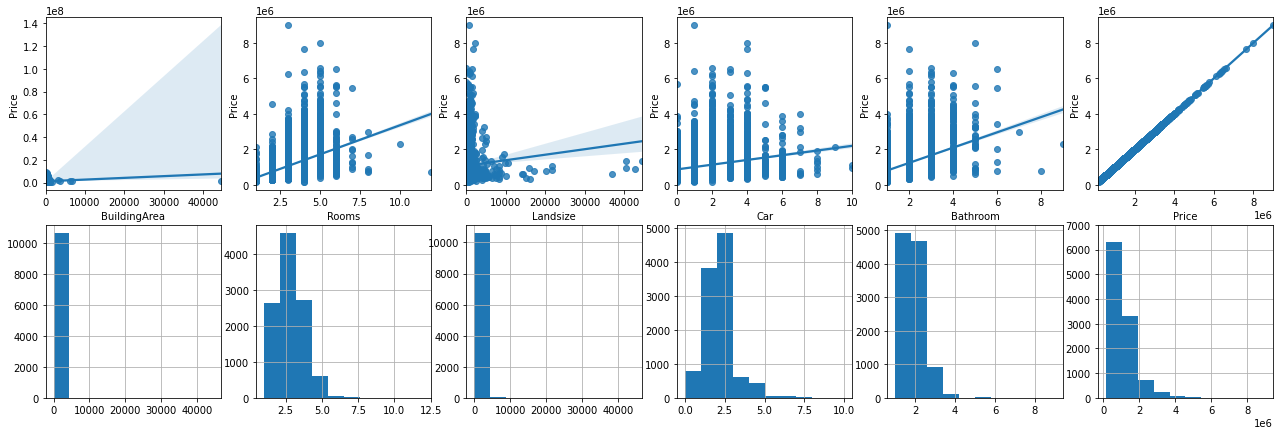

In [8]:
plot_str_arr = ['BuildingArea', 'Rooms', 'Landsize', 'Car', 'Bathroom', 'Price']
f, axarr = plt.subplots(2, len(plot_str_arr), figsize=(22,7))

i = 0
for plt_str in plot_str_arr:
    sns.regplot(x=plt_str, y="Price", data=housing_df_no_nan, ax=axarr[0,i])
    housing_df_no_nan[plt_str].hist(ax=axarr[1,i])
    i += 1
axarr[1,5].set_ylim([0,7000])
f.canvas.set_window_title('Scatter Plots and Histograms')

## 3.3. Remove outliers

Outliers are data points located far away from the main mass of the data. These come with a risk of skewing the models and we would therefore like to remove them. 

In the plots above it seems like we have outliers in some of the columns. We will take a deeper look at some variables which seem to contain outliers. 

- Run the cell below to see a plot of *BuildingArea vs Price* where it is clear that we have some data points which are far away from the others

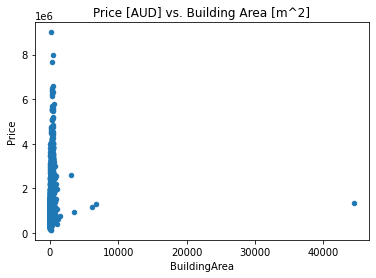

In [9]:
housing_df_no_nan.plot.scatter('BuildingArea', 'Price', title='Price [AUD] vs. Building Area [m^2]')

1)   Set clip-offs:



*   Building area = 500 m^2 (all data points larger than 500 will be set to 500)
*   Price= 4 000 000 AUD

2)  Plot again! 

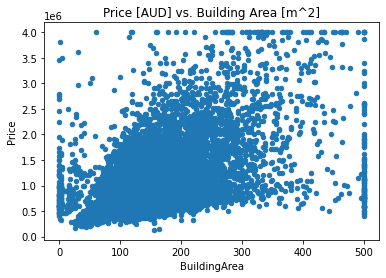

In [10]:
housing_clipped = housing_df_no_nan.copy()
housing_clipped['BuildingArea'] = housing_clipped['BuildingArea'].clip(0, 500)
housing_clipped['Price'] = housing_clipped['Price'].clip(0, 4e6)
housing_clipped.plot.scatter('BuildingArea', 'Price', title='Price [AUD] vs. Building Area [m^2]')

### ASSIGNMENT 1:

- Plot "Landsize" (unit=m^2) vs "Price" in the empty code cell below. 

Does it look like there are some outliers? If so, what could be a resonable cut-off level? <br>

***Hint:*** Have a look above at the statistical printouts for Landsize.
- Clip the data set to remove Landsize outliers, i.e replace the value of variable landsize_max with a resonable number. Plot again!
- Important, name your variable *housing_clipped_2* 

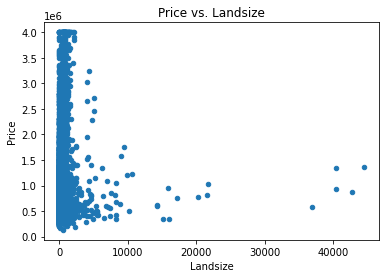

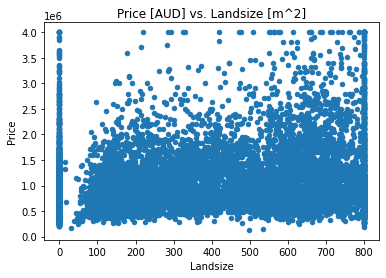

In [11]:
# ENTER CODE HERE


### SOLUTION ###
# Plot "Landsize" (unit=m^2) vs "Price" before clipping
housing_clipped.plot.scatter('Landsize', 'Price', title='Price vs. Landsize')

# Filter out or clip outliers for Landsize by setting resonable landsize value
landsize_max = 800
housing_clipped_2 = housing_clipped.copy()
housing_clipped_2['Landsize'] = housing_clipped['Landsize'].clip(0, landsize_max)
housing_clipped_2.plot.scatter('Landsize', 'Price', title='Price [AUD] vs. Landsize [m^2]')


## 3.4 Plot histograms for indicative columns
- Lets have a look more closely at the variables we think could be interesting by plotting seperate and larger histograms.

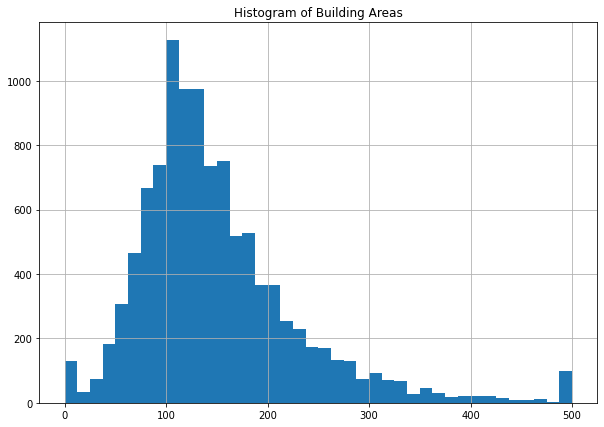

In [12]:
housing_clipped_2['BuildingArea'].hist(bins=40, figsize=(10,7))
plt.title('Histogram of Building Areas');

### ASSIGNMENT 2:

- Create a histogram of the variable Price in the empty code cell below

***Hint:** use the same number of bins and figure size as above

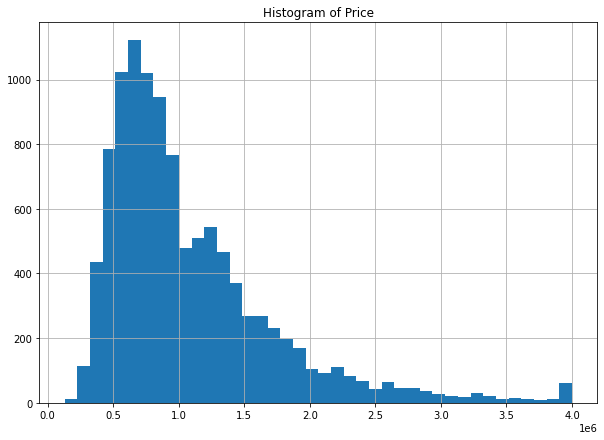

In [13]:
# CODE HERE


# SOLUTION
housing_clipped_2['Price'].hist(bins=40, figsize=(10,7))
plt.title('Histogram of Price');

## 3.5 Price for different regions
We are hypothesising that the property location will have an impact on the price. 
- Run the code below to plot to get a feel for how the price behaves in different locations

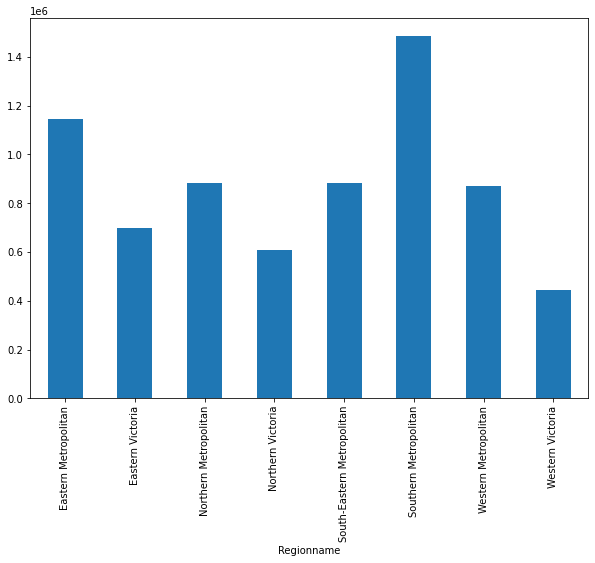

In [14]:
plt.figure(figsize=(10,7))
housing_clipped_2.groupby('Regionname')['Price'].mean().plot.bar();

### ASSIGNMENT 3: 
- Plot the average (mean) price for the each different CouncilArea, to see how they compare to one another

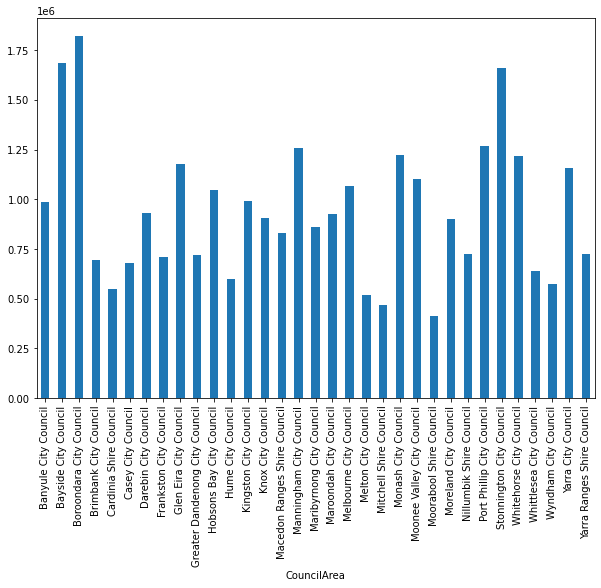

In [15]:
# CODE HERE

# SOLUTION
plt.figure(figsize=(10,7))
housing_clipped_2.groupby('CouncilArea')['Price'].mean().plot.bar();

## 3.6 Print functions for evaluation matrix results

In [ ]:
#Functions for printing evaluation results
def print_results_linreg (mean_absolute_error_simple_formated, mean_baseline_error_formated):
    print("\n******************* ALL RESULTS IN THIS EXECUTION ROUND *********************************************\n")
    print('* Mean Absolute Error with Simple Linear Regression = ' + mean_absolute_error_simple_formated)
    print('* Mean Absolut Error for Baseline Model = ' + mean_baseline_error_formated)

    if mean_absolute_error_simple_formated < mean_baseline_error_formated:
        print ('\nMean Absolute Error with Simple Linear Regression is smaller then Mean Absolute Error as Baseline Model. Good!')
    print ("\n*****************************************************************************************************")

def print_results_multidim (mean_absolute_error_multidim_formated, mean_absolute_error_simple_formated):
    print("\n***************************** EVALUATION RESULTS IN THIS EXECUTION ROUND **************************************** \n")
    print('* MAE with Multi-Dimensional Linear Regression = ' + mean_absolute_error_multidim_formated)
    print('* MAE with Simple Linear Regression = ' + mean_absolute_error_simple_formated)

    if mean_absolute_error_multidim_formated < mean_absolute_error_simple_formated:
        print ('\n Mean Absolute Error with Multi-Dimensional Linear Regression is smaller than Simple Linear Regression". \n Good, our new multivariable regression model is better!')
    print ("\n*****************************************************************************************************************")

def print_results_nn (mean_nn_error_formated): 
    print ("\n ***************** EVALUATION RESULTS IN THIS EXECUTION ROUND *********************\n")
    print ("* MAE with Simple Linear Regression = "+ mean_absolute_error_simple_formated)
    print ("* MAE with MultiDimensional Linear Regression = "+ mean_absolute_error_multidim_formated)
    print ("* MAE with this NN execution = "+ mean_nn_error_formated)
    print ("\n***********************************************************************************")

def print_results_rf(mean_rf_error_formated):
    print ("\n ***************** EVALUATION RESULTS IN THIS EXECUTION ROUND *********************\n")
    print ("* MAE with Simple Linear Regression = "+ mean_absolute_error_simple_formated)
    print ("* MAE with MultiDimensional Linear Regression = "+ mean_absolute_error_multidim_formated)
    print ("* MAE with this NN execution = "+ mean_nn_error_formated)
    print ("* MAE with Random Forest execution = "+ mean_rf_error_formated)
    print (" \n Random Forest rules on this dataset :) ")
    print ("\n***********************************************************************************")

# 4) BUILD/TRAIN MODEL: SIMPLE LINEAR REGRESSION

We are getting a feeling for what the data looks like, so now we might try a first model for predicting the price on the properties for sale. 

The simple linear regression, with one predictor variable (X) and one output variable (Y), is a very commonly used model. 

- We pick BuildingArea as a predictor to begin with, since there seems to be a correlation between BuildingArea and Price according to our exploration through the plots. 

- The goal is to find all of the weights, $w_i$, in the following linear regression model. 


> $y = w_0 + w_1x_1$


***Need a reminder?*** For more information about supervised learning and regression, please refer to section 3 in the course material for the simple linear regression.



## 4.1 Split dataset, pick algorithm, train model

- Run the code below to set up the variables, split the data set and train the model

[4324.26650735]


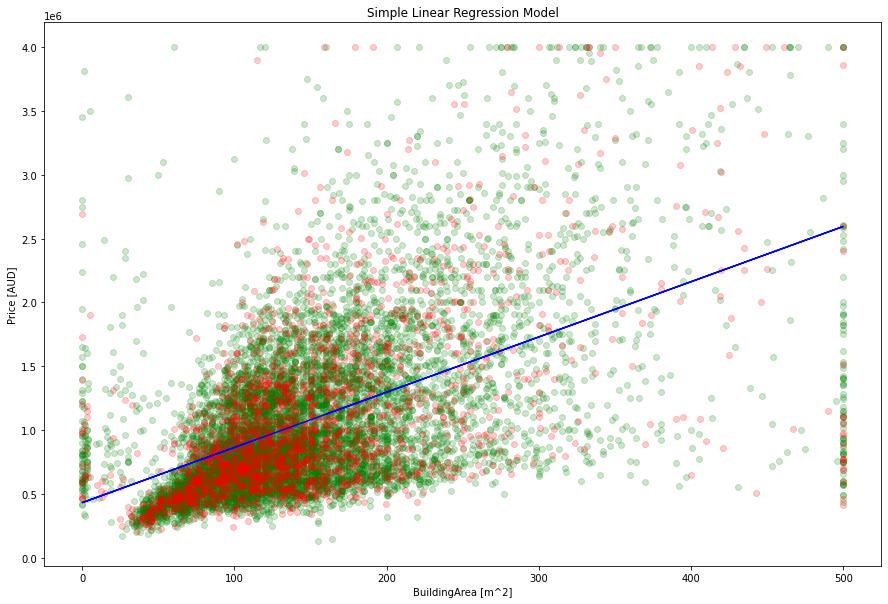

In [16]:
# Set up input (x) and output (y) variables
x = housing_clipped_2[['BuildingArea']]
y = housing_clipped_2['Price']

# Split into test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle=False)

# Set up and train simple linear regression model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Perform predictions on testset
y_pred_simple = regr.predict(x_test)


### Plot results ###

# Prepare plotting figure and axes
plt.figure(figsize=(15,10));
plt.title('Simple Linear Regression Model');
plt.xlabel('BuildingArea [m^2]', fontsize=10)
plt.ylabel('Price [AUD]', fontsize=10)

# Plot training data in green color
plt.scatter(x_train.values, y_train.values, color='green', alpha=0.2)
# Plot test data in red color
plt.scatter(x_test.values, y_test.values, color='red', alpha=0.2)

# Plot the simple regression line based on test data in blue color
plt.plot(x_test, y_pred_simple, 'b')

print (regr.coef_)


## 4.2 Model evaluation
The error value will be compared to a baseline error, which is the error compared to if the prediction is just the mean of previous house values. 

In [17]:
# Evaluate Results

mean_absolute_error_simple = int((y_pred_simple - y_test).abs().mean())
mean_absolute_error_simple_formated = str('{:,}'.format(mean_absolute_error_simple).replace(',',' '))
mean_baseline_error = int((y_train.mean() - y_test).abs().mean())
mean_baseline_error_formated = str('{:,}'.format(mean_baseline_error).replace(',',' '))

# Printing results of evaluation
print_results_linreg(mean_absolute_error_simple_formated, mean_baseline_error_formated)

NameError: ignored

# 5) BUILD/TRAIN MODEL: MULTI-DIMENSIONAL LINEAR REGRESSION

In order to increase the predictive power - i.e. to get a more accurate model - more information can be added to the model. 

One way of doing that is by adding more input variables to the model. Variables that could be tried are BuildingArea, Rooms, LandSize, Car. 

**Need a reminder?** The formula for the multi-dimensional linear regression is:

> $y = w_0 + w_1x_1 + w_2x_2 + \dots$


## 5.1 Split dataset, pick algorithm, train model

In [ ]:
# Select fields/features for the model
features_list = ['BuildingArea', 'Rooms', 'Car', 'Landsize']
x = housing_clipped_2[features_list]
y = housing_clipped_2['Price']

# Split into test and train data
x_train_multidim, x_test_multidim, y_train_multidim, y_test_multidim = train_test_split(x, y, test_size=0.2, shuffle=False)

# Set up and train regression model
regr_multidim = linear_model.LinearRegression()
regr_multidim.fit(x_train_multidim, y_train_multidim)

# Perform predictions
y_pred_multidim = regr_multidim.predict(x_test_multidim)


######### Plot results ##########

# Prepare plotting figure and axes
plt.figure(figsize=(15,10));
plt.title('Multidimensional Linear Regression Model');
plt.xlabel('BuildingArea [m^2]', fontsize=10)
plt.ylabel('Price [AUD]', fontsize=10)

# Plot training data in green color
plt.scatter(x_train_multidim['BuildingArea'].values, y_train_multidim.values, color='green', alpha=0.2)
# Plot test data in red color
plt.scatter(x_test_multidim['BuildingArea'].values, y_test_multidim.values, color='red', alpha=0.2)

# Plot the multidim regression line based on test data in black color
plt.plot(x_test_multidim['BuildingArea'], y_pred_multidim, 'k.')
#plt.plot(x_test_multidim['BuildingArea'], y_pred_simple, 'b')


# Print regression coefficients, w
print('* Regression coefficients:')
i=0
print('Number of features used = ' + str(len(features_list)))
while i<len(features_list):
    print(features_list[i] + ' = ' + str(regr_multidim.coef_[i]))
    i+=1


## 5.2 Model evaluation

In [ ]:
# Evaluate Results
mean_absolute_error_multidim = int((y_pred_multidim - y_test_multidim).abs().mean())
mean_absolute_error_multidim_formated = str('{:,}'.format(mean_absolute_error_multidim).replace(',',' '))

# Printing results of evaluation
print_results_multidim (mean_absolute_error_multidim_formated, mean_absolute_error_simple_formated)

## ASSIGNMENT 4:
- Test your multidimensional model by adding some more fields/features, please refer to 20 available features in the dataset columns list.
>**Q 4.1:** Write down the results and compare!

**Hint**: Modify the second line of code in section 5.1. Add/remove features in features_list. Retrain the model and evaluate!

**Hint 2**: Try features that are represented by text (such as 'Suburb'). Something happens with the code - why?

**Answers**: Provide them in the separate "Solutions and Answering sheet" document. 



# 6) BUILD/TRAIN MODEL: ARTIFICAL NEURAL NETWORK


## 6.1 Split dataset, pick algorithm, train & evaluate model

The code in the following cell transforms data, builds a neural network and evaluates results of predictions from the neural net.

Some good reading about the different steps using the Keras library:
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

***Need a reminder?*** For more information about ANN, please refer to section 4 in the course material.

In [ ]:
def run_neural_network(x, y, n_epochs=10, layer_list=[100,20], dropout_bool=False):
    global mean_nn_error_formated

    # Split the dataset in training and test sets, skipping the validation set.
    x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(x, y, train_size=0.8, test_size=0.2, shuffle=False)
    
    # Scale the data
    #scaler = MinMaxScaler()
    scaler = StandardScaler()

    x_train_nn = scaler.fit_transform(x_train_nn)
    x_test_nn = scaler.transform(x_test_nn)
    y_train_nn = scaler.fit_transform(y_train_nn.values.reshape(len(y_train_nn),1))
    y_test_nn= scaler.transform(y_test_nn.values.reshape(len(y_test_nn),1))
   
    # Define the NN structure (with Keras): 3 layers with (100,20,1) neurons, train.shape[1] input variables
    model = Sequential()
    model.add(Dense(layer_list[0], input_dim=x_train_nn.shape[1], activation='relu'))
    for layer_size in layer_list[1:]:
        if dropout_bool:
            model.add(Dropout(0.3))
        model.add(Dense(layer_size, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    # Plot model summary
    # print(model.summary())
    
    # Compile model 
    model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])

    # Train the model
    history = model.fit(x_train_nn, y_train_nn, epochs=n_epochs, verbose=0, validation_data=(x_test_nn, y_test_nn))

    # Make a prediction
    y_pred_nn = model.predict(x_test_nn)[:,0]
    
    # Show the inputs and predicted outputs
    y_pred_nn = scaler.inverse_transform(y_pred_nn.reshape(len(y_pred_nn),1))
    y_test_nn = scaler.inverse_transform(y_test_nn)

    # Evaluate results
    mean_nn_error = int((pd.Series(y_pred_nn[:,0]) - y_test_nn[:,0]).abs().mean())
    mean_nn_error_formated = str('{:,}'.format(mean_nn_error).replace(',',' '))
    
    # Print evaluations
    print_results_nn(mean_nn_error_formated)

    # Plot error over training time
    plt.figure(figsize=(10,7))
    plt.plot(history.history['mean_squared_error'], label='Train')
    plt.plot(history.history['val_mean_squared_error'], label='Validation')
    plt.title('Model Loss')
    plt.ylabel('Mean Squared Error')
    plt.xlabel('Epoch')
    #plt.legend(['Test', 'Train'], loc='upper left')
    plt.legend()
    plt.show()
    

## 6.2 Run ANN model:
Run the model a couple of times to see that the results may differ between runs. The reason for this is that weights are initialized randomly and that the training algorithm contains some random operations. 

In [ ]:
# Select fields/features for the model
features_list = ['BuildingArea', 'Rooms', 'Car', 'Landsize', 'Bathroom']
x = housing_clipped_2[features_list]
y = housing_clipped_2['Price']

# Train/run neural network
run_neural_network(x, y, 20, [20, 10])


### ASSIGNMENT 5:
- Try running the model with different number of training epochs. 
>**Q 5.1:** What happens with the loss for a higher amount of training epochs?

**Hint:** Modify last line of code under section 6.2

**Answers:** Provide them in the separate "Solutions and Answering sheet" document. 


## 6.3 Improving ANN model - Adding more features

- Let's look at the data to see what we can do with it to create columns which are more easily readable for a ML algorithm and how we can get more insights from the data we have.
- Lets try and make the predictive model as good as possible by adding more features such as location and age of property. 

### 6.3.1 Add feature: House age
Using the year of construction for a house straight away as a feature is not a good idea, since most values will be around the 2000s. 

A small difference in the absolute value of a feature might lead to a big difference in the actual house value; e.g. a house built in 2017 is probably a lot more valuable than a house built in 2007. To emphasize the differences in our dataset, we will create the age of the building from the variable *YearBuilt*. 

We also log-transform the age to make it a bit more convenient for the ML algorithms. 

In [ ]:
# Create house_ages feature
year_built = housing_clipped_2['YearBuilt'].clip(0,2020)
house_ages = pd.Series(np.log((1 + (2020. - year_built))))
house_ages = house_ages.fillna(house_ages.mean())
house_ages.name = 'Age'
plt.figure()
house_ages.hist()
plt.title('Distribution After Logarithm')
house_ages_df = pd.DataFrame(house_ages)
features_w_age = pd.concat([housing_clipped_2, house_ages_df], axis=1)

*  Run the model with the *house_ages* feature added.



In [ ]:
# Select fields/features for the model
new_feature_list = ['BuildingArea', 'Rooms',  'Car', 'Landsize'] + ['Age'] # + list(one_hot_region.columns)

# Train/execute neural network
run_neural_network(features_w_age[new_feature_list], features_w_age['Price'], n_epochs=20, layer_list=[20,10])

### 6.3.2 Add feature: Regionname 
*   Add Regionname as a feature by transforming it to one-hot encoding

*   Run the model with feature Regionname added

**Need a reminder?** For more information about feature engineering, please refer to section 5.


In [ ]:
# Create region name feature with One-Hot encoding
one_hot_region = pd.get_dummies(housing_clipped_2.Regionname, prefix='Regionname')
region_feature = pd.concat([housing_clipped_2, one_hot_region], axis=1)

# Select fields/features for the model
new_feature_list = ['BuildingArea', 'Rooms', 'Car', 'Landsize'] + list(one_hot_region.columns)
x_new_features = region_feature[new_feature_list]
y_new_features = region_feature['Price']

# Train/execute neural network
run_neural_network(x_new_features, y_new_features, layer_list=[20,10])


### ASSIGNMENT 6:
* Try different sizes of the neural network. 
* Try out the below network configurations and observe the MAE (Mean Absolute Error) for test and train data.The lists below are denoted such that the 1st entry represents the number of neurons in the 1st layer, 2nd entry in the 2nd layer and so on.

>1.   Configuration 1: [2, 1]
>2.   Configuration 2: [20, 10]  (increasing the number or neurons)
>3.   Configuration 3: [1000, 100] (increasing the number or neurons even more)
>4.   Configuration 4: [5, 5, 5, 2] (more layers, the term deep learning originates from using many layers)
>5.   Configuration 5: Test your own configuration if you want to.


**Hint:** Modify 11th line of code under section 6.3.2


> **Q 6.1:** What are the results when adding more layers? <br>
**Q 6.2:** What are the results when adding more neurons? <br>
**Q 6.3:** When is there a difference between the train and test data in Mean Squared Error?  <br> 

**Answers:** Provide them in the separate "Solutions and Answering sheet" document. 

# EXTRA & DISCUSSION EXERCISES

### ASSIGNMENT 7 (EXTRA): 
Trying adding more features  by adjusting the code above.

> **Q 7.1:** Which columns/features could be useful for providing more predictive power?  <br> 

**Answers:** Provide them in the separate "Solutions and Answering sheet" document. 

In [ ]:
# ENTER CODE HERE


### SOLUTION ###
# Create council area feature with One-Hot encoding
one_hot_council = pd.get_dummies(housing_clipped_2.CouncilArea, prefix='CouncilArea')
council_feature = pd.concat([housing_clipped_2, one_hot_council, one_hot_region], axis=1)

# Select fields/features for the model
new_feature_list = ['BuildingArea', 'Rooms', 'Car', 'Landsize'] + list(one_hot_council.columns) + list(one_hot_region.columns) 
x_new_features = council_feature[new_feature_list]
y_new_features = council_feature['Price']

# Train/execute neural network
run_neural_network(x_new_features, y_new_features, layer_list=[20,10])


## ASSIGNMENT 8 (EXTRA):

ML flow step 5, section 5 in the course material, emphasizes the importance of trying different algorithms when looking for the best performing model. 

In the code cells below create, build and train a Random Forest model. Compare the MAE results from those models with model results from above. 

Please refer to the Scikit-learn documentation:


> **Random Forest** <br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html <br>
https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/




In [ ]:
# SOLUTION:

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=None, random_state=0, n_estimators=200)

x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x_new_features, y_new_features, train_size=0.8, test_size=0.2, shuffle=False)
regr.fit(x_train_rf, y_train_rf)
y_pred_rf = regr.predict(x_test_rf)

 # Evaluate results
mean_rf_error = int(round (mean_absolute_error(y_test_rf, y_pred_rf),0))
mean_rf_error_formated = str('{:,}'.format(mean_rf_error).replace(',',' '))

# Print results of the evaluation
print_results_rf(mean_rf_error_formated)

## ASSIGNMENT 9 (DISCUSSION QUESTIONS):

> **Q 9.1:** What were the two lowest MAE (Mean Absolute Error) values you got and from which models? Why do you think it was these models that performed the best? <br>
**Q 9.2:** Why does a well-tuned neural network perform better than a linear regression model in this case?  <br>
**Q 9.3:** What could be done to improve model performance?  <br>  

**Answers:** Provide them in the separate "Solutions and Answering sheet" document. 


